In [63]:
import pandas
from analyze_features import clearFeature

fileName = "../../original-data/pilot2/responses.csv"
responsesDF = pandas.read_csv(fileName)

fileName = "../../original-data/pilot2/responses.csv"
responsesDF = pandas.read_csv(fileName)
responsesDF.head()

,Timestamp,If you give your consent to take part please click 'I agree' below,Please enter your Prolific ID,What is your reading level of English?,1. [2rf32u],2.,3.,4.,5.,1. [2r82dn],...,1. [2ro0ti],2..8,3..8,4..8,5..8,1. [2rndst],2..9,3..9,4..9,5..9
0,4/21/2023 19:10:48,I agree,614b2827c28c7d615cdfe0f3,Mother tongue,Young,Rational,Motivated,Enthusiastic,Angered,Informed,...,Creative,Calm,Imaginative,Angered,Informed,Angered,Opinionated,Informed,Scared,Sad
1,4/21/2023 19:17:18,I agree,5fb06c5ed64e5a453208ebed,Fluent,Mature,Older,Boomer,Silly,Naive,Skeptic,...,Skeptical,Analytical,Fact-seeking,Critical,Questioning,Skeptical,Pragmatic,Critical,Prioritizes citizens,Humanitarian
2,4/21/2023 19:17:57,I agree,602406d7cb1a9003573e38af,Capable,smart,open-minded,confident,realistic,irresponsible,communist-skeptic,...,sceptical,ignorant,confident,aggresive,open-minded,ignorant,stupid,illogical,confident,irrational
3,4/21/2023 19:18:29,I agree,60fc6d93a191bc5ebe572121,Fluent,Angry,Aggravated,Rude,Self centered,Jealous,Inquisitive,...,Worried,Skeptical,Upset,Concerned,Honest,Frightened,Concerned,Worried,Curious,Thankful
4,4/21/2023 19:20:15,I agree,5ed9fe560adb8b5a860d8d80,Fluent,Inteligent,Decisive,Persistent,extroverted,wild,rational,...,extroverted,tough,fealess,wild,straight forward,Inteligent,Rational,frank,intuitive,practical


# Feature analysis

In [2]:
from collections import Counter

# removing unnecesary columns, clearing features a little bit
featuresDF = responsesDF.iloc[:, 4:].applymap(clearFeature)
allFeatures = featuresDF.stack()

# unique features
featureCounts = Counter(allFeatures)

# should be 1000 = 20 (annotators) x 10 (texts) x 5 
print("All features:", len(allFeatures))
print("All unique features:", len(featureCounts))

print("Most common:")
featureCounts.most_common(10)

All features: 1000
All unique features: 570
Most common:


[('male', 22),
 ('skeptical', 16),
 ('opinionated', 12),
 ('open-minded', 11),
 ('confident', 11),
 ('curious', 11),
 ('young', 10),
 ('rational', 10),
 ('critical', 10),
 ('analytical', 8)]

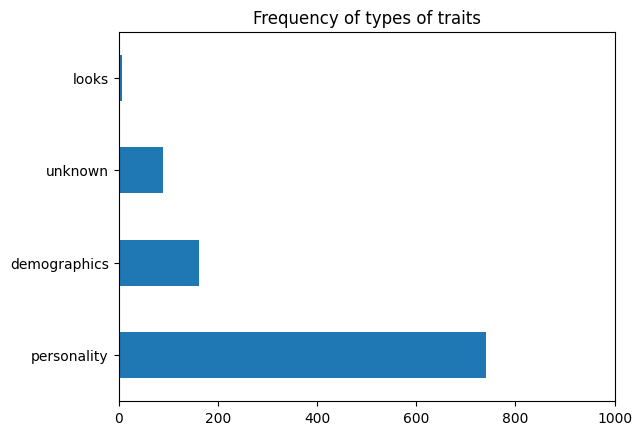

In [3]:
from analyze_features import readFeatureTypes
import matplotlib.pyplot as plt

featureTypes = readFeatureTypes("../../original-data/traits/types")
typesDF = featuresDF.applymap(lambda x : featureTypes[x])

typesCounts = typesDF.stack().value_counts()

# create a bar chart of the types
typesCounts.plot(kind='barh')

# set the axis labels and title
plt.xlim(0, len(featuresDF.stack()))
plt.title('Frequency of types of traits')
plt.show()

In [4]:
for featureType in typesCounts.keys():
    features = Counter({k: v for k, v in featureCounts.items() if featureTypes[k] == featureType})
    print(featureType, ": ", features.most_common(5))

personality :  [('skeptical', 16), ('opinionated', 12), ('open-minded', 11), ('confident', 11), ('curious', 11)]
demographics :  [('male', 22), ('young', 10), ('religious', 7), ('american', 7), ('educated', 6)]
unknown :  [('different', 3), ('no idea', 3), ('makes sense', 2), ('explanatory attribution', 2), ('colloquial', 2)]
looks :  [('dark', 4), ('dwarfish', 1), ('conventionally attractive', 1), ('fat', 1)]


Two zeros (unknown words?): 256


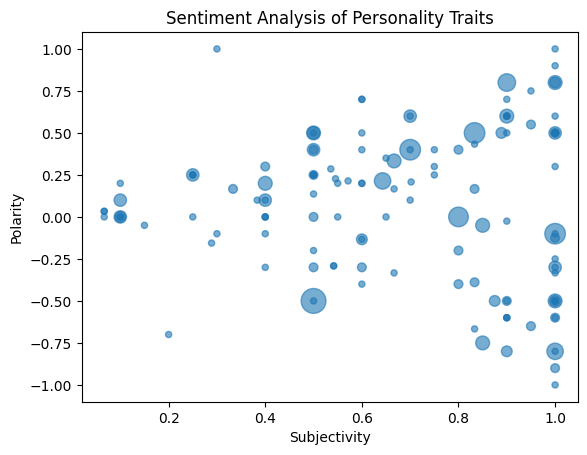

In [5]:
from textblob import TextBlob
import matplotlib.pyplot as plt

unknown = [ ]
words = [ ]
polarities = []
subjectivities = []
sizes = [ ]

personalityWords = Counter({k: v for k, v in featureCounts.items() if featureTypes[k] == "personality"})
for word, freq in personalityWords.items():
    blob = TextBlob("This person is " + word)

    if  blob.sentiment.polarity == 0 and blob.sentiment.subjectivity == 0:
        unknown.append(word)
        continue

    words.append(word)
    polarities.append(blob.sentiment.polarity)
    subjectivities.append(blob.sentiment.subjectivity)
    sizes.append(20 * freq)

#for i, word in enumerate(words):
#    if i % 5 == 0:
#        plt.annotate(word, xy=(subjectivities[i], polarities[i]), xytext=(5,5), textcoords='offset points')


print("Two zeros (unknown words?):", len(unknown))

plt.scatter(subjectivities, polarities, s=sizes, alpha=0.6)
plt.title("Sentiment Analysis of Personality Traits")
plt.xlabel("Subjectivity")
plt.ylabel("Polarity")
plt.show()

In [57]:
from analyze_features import generatePointsToPlot

def describe(anns):
    text = ", ".join(anns[:-1])
    text += ", and " + anns[-1]
    return text

allTexts = [ ]
for _, row in featuresDF.iterrows():
    anns = [ ]
    for index, elem in enumerate(row):
        if index % 5 == 0 and anns:
            allTexts.append(describe(anns))
            anns = [  ]
            
        anns.append(elem)

    allTexts.append(describe(anns))

X, Y = generatePointsToPlot(allTexts)
print(len(allTexts), len(X), len(Y))

Some weights of the model checkpoint at distilbert-base-uncased were not used when initializing DistilBertModel: ['vocab_projector.weight', 'vocab_layer_norm.weight', 'vocab_layer_norm.bias', 'vocab_transform.bias', 'vocab_transform.weight', 'vocab_projector.bias']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


200 200 200


young, rational, motivated, enthusiastic, and angered
informed, ethical, extremist, comunist, and unhappy
creative, imaginative, open-minded, dark, and depressed
religious, open-minded, dark, sad, and well travelled
dark, close-minded, sad, scientific, and hopeful


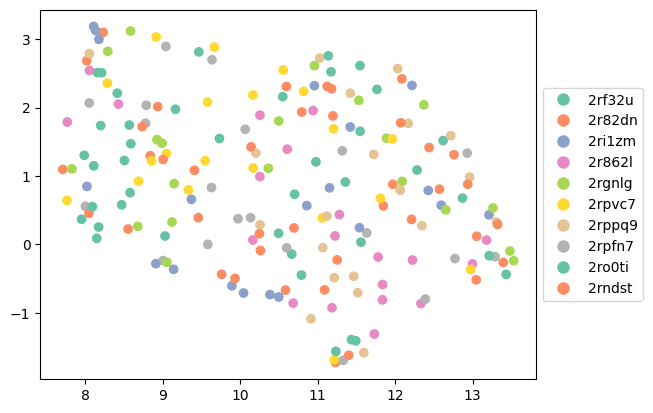

In [58]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

def plotDataWithLabels(categories, labels):
    # List of colors in the color palettes
    rgb_values = sns.color_palette("Set2", len(categories))

    # Map continents to the colors
    color_map = dict(zip(categories, rgb_values))
    colors = [ color_map[category] for category in labels ]

    plt.scatter(X, Y, c = colors)

    legend_elements = [plt.Line2D([0], [0], marker='o', color='w', label=category, 
                                  markerfacecolor=color_map[category], markersize=10) for category in categories]

    plt.legend(handles=legend_elements, loc='center left', bbox_to_anchor=(1, 0.5))

    # display the plot
    plt.show()

def generatePostLabels():
    lbls = [ lbl.split("[")[1].strip()[:-1] for lbl in featuresDF.columns if "[" in lbl ]
    return lbls, lbls * 20

print("\n".join(allTexts[:5]))
categories, labels = generatePostLabels()
plotDataWithLabels(categories, labels)

# Annotator analysis

In [59]:
import pandas

fileName = "../../original-data/pilot2/participants.csv"
participantsDF = pandas.read_csv(fileName)
participantsDF.head()

,Submission id,Participant id,Status,Started at,Completed at,Reviewed at,Archived at,Time taken,Completion code,Total approvals,...,Highest education level completed,Age,Sex,Ethnicity simplified,Country of birth,Country of residence,Nationality,Language,Student status,Employment status
0,6442c152b2df3bc1fc41c118,5d2759b64e5e3c00164fe922,APPROVED,2023-04-21T17:01:06.126000Z,2023-04-21T17:34:08.210000Z,2023-04-21T17:34:08.685000,2023-04-21T17:34:08.625567Z,1983,C16AD8BI,141,...,Undergraduate degree (BA/BSc/other),21,Male,White,Hungary,Hungary,Hungary,Hungarian,DATA_EXPIRED,DATA_EXPIRED
1,6442c15ae03ce474bbfcfd98,5f14e794a89ac35a3f89801d,APPROVED,2023-04-21T17:01:14.253000Z,2023-04-21T17:25:16.129000Z,2023-04-21T17:25:18.361000,2023-04-21T17:25:18.261319Z,1442,C16AD8BI,136,...,High school diploma/A-levels,28,Female,Mixed,South Africa,South Africa,South Africa,English,Yes,Part-Time
2,6442c15dc46cf16584ab2c4d,60f5225af314d1b238df4379,APPROVED,2023-04-21T17:01:23.682000Z,2023-04-21T17:28:36.459000Z,2023-04-21T17:28:37.418000,2023-04-21T17:28:37.348794Z,1633,C16AD8BI,17,...,Undergraduate degree (BA/BSc/other),23,Female,Black,South Africa,South Africa,South Africa,English,No,Full-Time
3,6442c16a2349053b40fcfd67,60f82f556af4c285a10d6fa0,APPROVED,2023-04-21T17:01:30.355000Z,2023-04-21T17:31:34.251000Z,2023-04-21T17:31:36.653000,2023-04-21T17:31:36.587901Z,1804,C16AD8BI,85,...,Undergraduate degree (BA/BSc/other),24,Female,Black,South Africa,South Africa,South Africa,English,DATA_EXPIRED,DATA_EXPIRED
4,6442c16f521b24773b85c634,602406d7cb1a9003573e38af,APPROVED,2023-04-21T17:01:35.522000Z,2023-04-21T17:17:59.498000Z,2023-04-21T17:17:59.988000,2023-04-21T17:17:59.919214Z,984,C16AD8BI,197,...,High school diploma/A-levels,22,Male,White,Poland,Poland,Poland,Polish,Yes,Full-Time


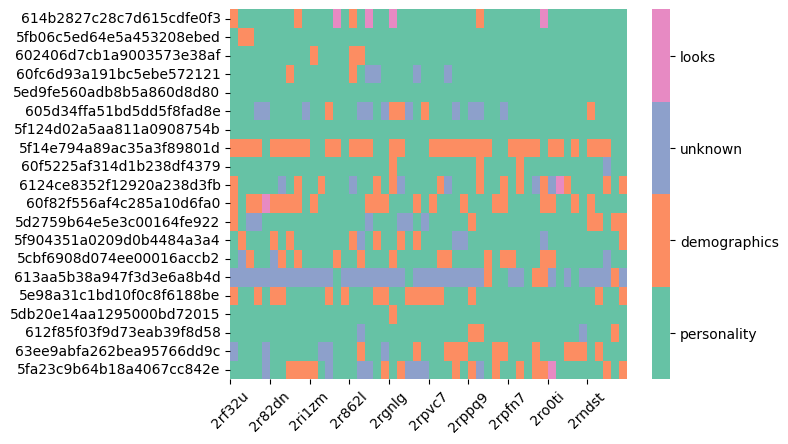

In [60]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

catsIds = { val:key for (key,val) in enumerate(typesCounts.keys()) }
intFeaturesDF = typesDF.applymap(lambda x : catsIds[x])

# create a heatmap of the DataFrame
ax = sns.heatmap(intFeaturesDF, cmap=sns.color_palette("Set2", len(catsIds)))

# fix the legend
colorbar = ax.collections[0].colorbar
r = colorbar.vmax - colorbar.vmin
colorbar.set_ticks([colorbar.vmin + 0.5 * r / len(catsIds) + r * i / len(catsIds) for i in range(len(catsIds))])
colorbar.set_ticklabels(list(typesCounts.keys()))

# y labels
ax.set_yticklabels(responsesDF.iloc[:,2].values)
plt.yticks(rotation = 0)

# x labels
lbls = [ lbl.split("[")[1].strip()[:-1] for lbl in featuresDF.columns if "[" in lbl ]
plt.xticks(range(0, len(featuresDF.columns ), 5), rotation = 45)
ax.set_xticklabels(lbls)

# display the plot
plt.show()

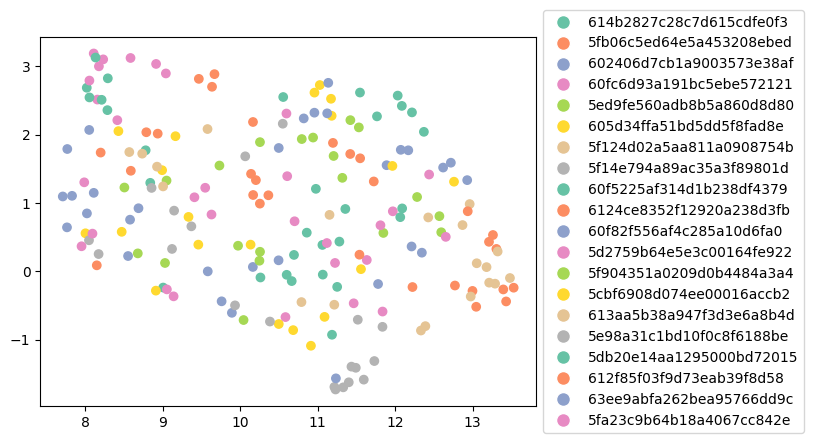

In [61]:
def generateAnnotatorLabels():
    lbls = responsesDF.iloc[:,2].values
    anns = [ ]

    for lbl in lbls:
        anns += [ lbl ] * 10
        
    return lbls, anns

categories, labels = generateAnnotatorLabels()
plotDataWithLabels(categories, labels)